In [1]:
import tensorflow as tf
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten , Conv2D, MaxPool2D , GlobalAveragePooling2D, concatenate, Input
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import seaborn as sns

In [2]:
width = 128
num_classes = 8
trainpath = './ImagesDataset/Train/'
testpath = './ImagesDataset/Test/'
trainImg = [trainpath+f for f in listdir(trainpath)]
testImg = [testpath+f for f in listdir(testpath)]
# print(trainpath)
# print(testpath)
print(trainImg)
print(testImg)
# img = cv2.imread('./ImagesDataset/Test/BlackWhip/BlackWhipTest (12).jpg')
# img
# img = cv2.imread(img , cv2.COLOR_BGR2RGB)

# # cv2.imshow(img)
# # rawImgs.append(img)

# # Load the image
# img = cv2.imread('./ImagesDataset/Test/BlackWhip/BlackWhipTest (12).jpg')

# # Flip the image horizontally
# flipped_img = cv2.flip(img, 1)
# img = cv2.resize(img ,(width,width))
# flipped_imgresize = cv2.resize(flipped_img ,(width,width))

# # Show the original and flipped images
# cv2.imshow('Original Image', img)
# cv2.imshow('Flipped Image', flipped_imgresize)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

['./ImagesDataset/Train/BlackDot', './ImagesDataset/Train/BlackWhip', './ImagesDataset/Train/LeafBurn', './ImagesDataset/Train/RedLine', './ImagesDataset/Train/RingLeaf', './ImagesDataset/Train/RustMold', './ImagesDataset/Train/StreakMosaic', './ImagesDataset/Train/YellowLeaf']
['./ImagesDataset/Test/BlackDot', './ImagesDataset/Test/BlackWhip', './ImagesDataset/Test/LeafBurn', './ImagesDataset/Test/RedLine', './ImagesDataset/Test/RingLeaf', './ImagesDataset/Test/RustMold', './ImagesDataset/Test/StreakMosaic', './ImagesDataset/Test/YellowLeaf']


In [3]:
def img2data(path):
  rawImgs = []
  labels = []

  for imagePath in (path):
      for item in tqdm(listdir(imagePath)):
          file = join(imagePath, item)
          if file[-1] =='g':
            img = cv2.imread(file , cv2.COLOR_BGR2RGB)
            img = cv2.resize(img ,(width,width))
            rawImgs.append(img)
            l = imagePath.split('/')[3]
            if l == 'BlackDot': #ใบจุดดำ
              labels.append([1,0,0,0,0,0,0,0])         
            elif l == 'BlackWhip':#แส้ดำ
              labels.append([0,1,0,0,0,0,0,0])
            elif l == 'LeafBurn':#ใบไหม้
              labels.append([0,0,1,0,0,0,0,0])
            elif l == 'RedLine':#เส้นกลางใบแดง
              labels.append([0,0,0,1,0,0,0,0])
            elif l == 'RingLeaf':#ใบจุดวงแหวน
              labels.append([0,0,0,0,1,0,0,0])
            elif l == 'RustMold':#ราสนิม
              labels.append([0,0,0,0,0,1,0,0])
            elif l == 'StreakMosaic':#ใบด่าง
              labels.append([0,0,0,0,0,0,1,0])
            elif l == 'YellowLeaf':
              labels.append([0,0,0,0,0,0,0,1])#ใบเหลือง
  return rawImgs, labels 

x_train, y_train = img2data(trainImg)
x_test, y_test = img2data(testImg)

100%|██████████| 100/100 [00:19<00:00,  5.23it/s]


In [4]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.00
x_test /= 255.00

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3200, 128, 128, 3)
(3200, 8)
(800, 128, 128, 3)
(800, 8)


MobilenetV2

In [5]:
# โหลด MobilenetV2 model มาจาก tensorflow hub
mobilenetModel = tf.keras.applications.MobileNetV2(input_shape=(128,128,3),include_top=False, weights='imagenet')
mobilenetModel.trainable = False

# สร้าง model ใหม่ โดยเพิ่ม layer ต่อจาก model ที่โหลดมา
mobilenetModelModify = Sequential()
mobilenetModelModify.add(mobilenetModel)
mobilenetModelModify.add(Conv2D(128, 3, activation='relu'))
mobilenetModelModify.add(MaxPool2D(2))
mobilenetModelModify.add(Dense(16))
mobilenetModelModify.add(Flatten())
mobilenetModelModify.add(Dense(8, activation='softmax'))

# กำหนดตัวแปรในการ train model
mobilenetModelModify.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics= ['accuracy'])
mobilenetModelModify.fit(x_train, y_train, batch_size = 32, epochs = 50, verbose = 1, validation_data=(x_test, y_test))

# ทดสอบ model โดยการให้ทายผลจากข้อมูลอย่างละ 100 รูป
mobilenetPred = mobilenetModelModify.predict(x_test)
mobilenetPred = np.argmax(mobilenetPred ,axis=1)
# print(len(y_pred))
# print(y_pred)

Epoch 1/50
100/100 [==============================] - 31s 267ms/step - loss: 1.0874 - accuracy: 0.9038 - val_loss: 0.3797 - val_accuracy: 0.8813
Epoch 2/50
100/100 [==============================] - 25s 253ms/step - loss: 0.0063 - accuracy: 0.9987 - val_loss: 0.6103 - val_accuracy: 0.8000
Epoch 3/50
100/100 [==============================] - 25s 253ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4609 - val_accuracy: 0.8450
Epoch 4/50
100/100 [==============================] - 25s 254ms/step - loss: 4.1237e-04 - accuracy: 1.0000 - val_loss: 0.4312 - val_accuracy: 0.8612
Epoch 5/50
100/100 [==============================] - 25s 255ms/step - loss: 2.4024e-04 - accuracy: 1.0000 - val_loss: 0.4038 - val_accuracy: 0.8825
Epoch 6/50
100/100 [==============================] - 26s 256ms/step - loss: 1.8176e-04 - accuracy: 1.0000 - val_loss: 0.4005 - val_accuracy: 0.8838
Epoch 7/50
100/100 [==============================] - 25s 250ms/step - loss: 1.4670e-04 - accuracy: 1.0000 - val_loss:

In [ ]:
mobilenetModelModify.save('my_model.h5')

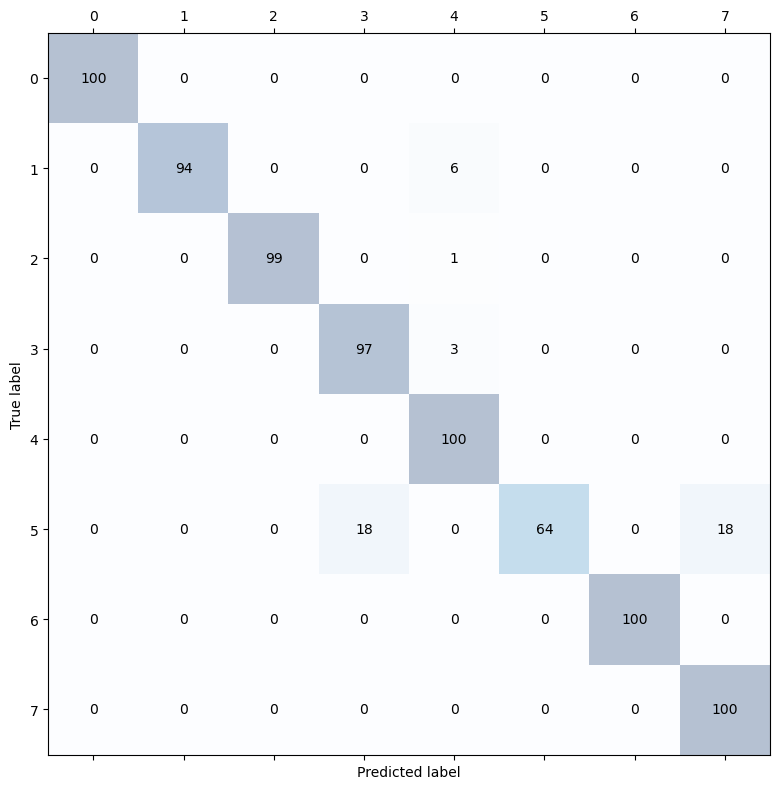

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      0.94      0.97       100
           2       1.00      0.99      0.99       100
           3       0.84      0.97      0.90       100
           4       0.91      1.00      0.95       100
           5       1.00      0.64      0.78       100
           6       1.00      1.00      1.00       100
           7       0.85      1.00      0.92       100

    accuracy                           0.94       800
   macro avg       0.95      0.94      0.94       800
weighted avg       0.95      0.94      0.94       800



INFO:tensorflow:Assets written to: mymodel\assets


INFO:tensorflow:Assets written to: mymodel\assets


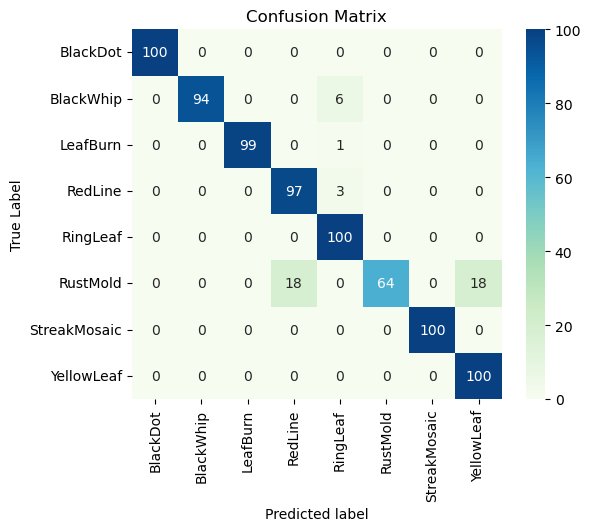

In [7]:
from sklearn.metrics import confusion_matrix , accuracy_score, recall_score , f1_score, classification_report

# ฟังก์ชันแปลง array 2d เป็น array 1d เพื่อแปลงค่า label ให้เป็นตัวเลข 0-7
def convert_to_1d_array(array_2d):
    array_1d = []
    for i in range(len(array_2d)):
        array_1d.append(array_2d[i])
    return array_1d

# แปลงค่า label ให้เป็นตัวเลข 0-7 และเก็บไว้ในตัวแปร resaultPredictLabels
mobilenetPredictLabels = convert_to_1d_array(mobilenetPred)
# print(resaultPredictLabels)

# สร้าง array ขนาด 800 ตัวเลข 0 เพื่อเก็บค่า label จริง
true_labels = np.zeros(800, dtype=int)
for i in range(8):
    true_labels[i*100:(i+1)*100] = i
# Print the array
# print(len(true_labels))


# นำค่าที่ได้มาใช้ในการวัดประสิทธิภาพของ model โดยใช้ confusion matrix, accuracy, recall, f1 score, classification report และ plot confusion matrix
# Create a confusion matrix
confusion_matrix = confusion_matrix(true_labels, mobilenetPredictLabels)
# Accuracy_score
accuracy_score = accuracy_score(true_labels, mobilenetPredictLabels)
# Recall_score
recall_score = recall_score(true_labels, mobilenetPredictLabels, average='macro')
# resaultPredict
f1_score = f1_score(true_labels, mobilenetPredictLabels, average='macro')
# Classification_report
classification_report = classification_report(true_labels, mobilenetPredictLabels)

# Print resault
# print(confusion_matrix)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(confusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x=j, y=i, s=confusion_matrix[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()
# print(accuracy_score)
# print(recall_score)
# print(f1_score)
print(classification_report)

# confusionmatrix
axes = sns.heatmap(confusion_matrix ,square=True, annot=True, fmt='d', cbar=True, cmap=plt.cm.GnBu)

classlabels = ['BlackDot', 'BlackWhip', 'LeafBurn', 'RedLine', 'RingLeaf', 'RustMold', 'StreakMosaic', 'YellowLeaf']

axes.set_xlabel('Predicted label')
axes.set_ylabel('True Label')

tick_marks = np.arange(len(classlabels)) + 0.5

axes.set_xticks(tick_marks)
axes.set_xticklabels(classlabels, rotation=90)

axes.set_yticks(tick_marks)
axes.set_yticklabels(classlabels, rotation=0)

axes.set_title('Confusion Matrix')

# mobilenetModelModify.save("mymodel")



LeNet-5

Epoch 1/10
100/100 [==============================] - 41s 404ms/step - loss: 0.7322 - accuracy: 0.7578 - val_loss: 0.7874 - val_accuracy: 0.7250
Epoch 2/10
100/100 [==============================] - 41s 410ms/step - loss: 0.0792 - accuracy: 0.9775 - val_loss: 0.9534 - val_accuracy: 0.8075
Epoch 3/10
100/100 [==============================] - 41s 414ms/step - loss: 0.0449 - accuracy: 0.9878 - val_loss: 0.9394 - val_accuracy: 0.7700
Epoch 4/10
100/100 [==============================] - 41s 408ms/step - loss: 0.0108 - accuracy: 0.9969 - val_loss: 1.1956 - val_accuracy: 0.7862
Epoch 5/10
100/100 [==============================] - 41s 409ms/step - loss: 0.0225 - accuracy: 0.9931 - val_loss: 0.9460 - val_accuracy: 0.7775
Epoch 6/10
100/100 [==============================] - 41s 411ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.8268 - val_accuracy: 0.8500
Epoch 7/10
100/100 [==============================] - 41s 410ms/step - loss: 2.3246e-04 - accuracy: 1.0000 - val_loss: 1.2164 - va

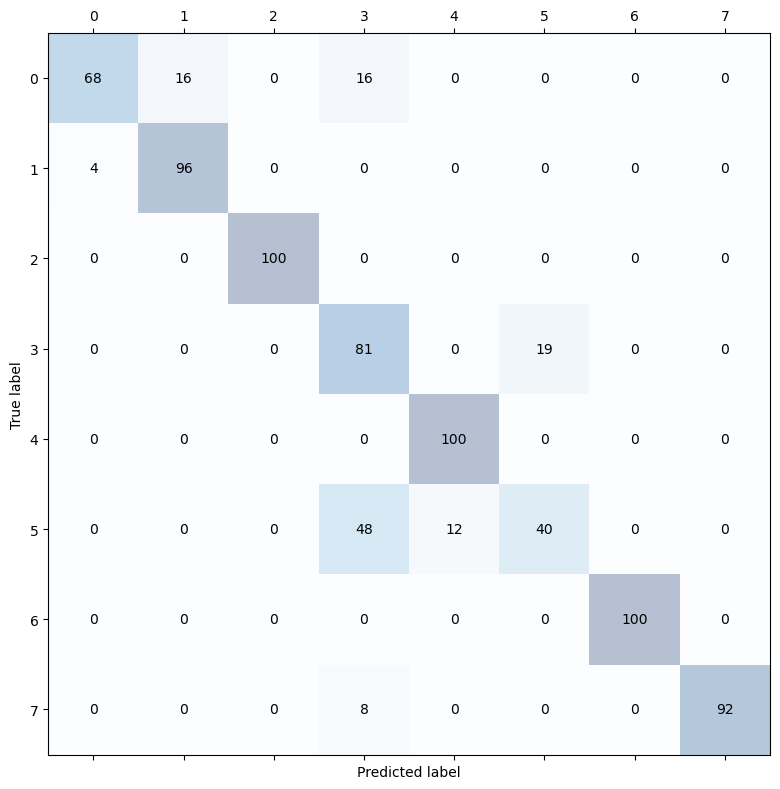

              precision    recall  f1-score   support

           0       0.94      0.68      0.79       100
           1       0.86      0.96      0.91       100
           2       1.00      1.00      1.00       100
           3       0.53      0.81      0.64       100
           4       0.89      1.00      0.94       100
           5       0.68      0.40      0.50       100
           6       1.00      1.00      1.00       100
           7       1.00      0.92      0.96       100

    accuracy                           0.85       800
   macro avg       0.86      0.85      0.84       800
weighted avg       0.86      0.85      0.84       800



Text(0.5, 1.0, 'Confusion Matrix')

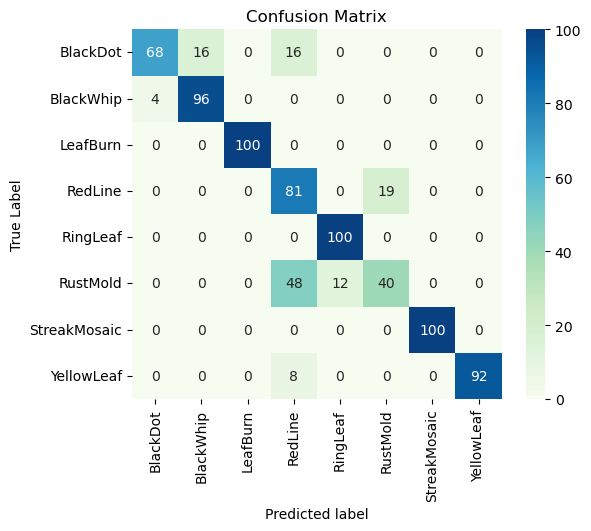

In [6]:
from sklearn.metrics import confusion_matrix , accuracy_score, recall_score , f1_score, classification_report

LeNet_5_Model = Sequential()
LeNet_5_Model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(128, 128, 3)))
LeNet_5_Model.add(MaxPool2D(strides=2))
LeNet_5_Model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
LeNet_5_Model.add(MaxPool2D(strides=2))
LeNet_5_Model.add(Flatten())
LeNet_5_Model.add(Dense(256, activation='relu'))
LeNet_5_Model.add(Dense(84, activation='relu'))
LeNet_5_Model.add(Dense(8, activation='softmax'))

LeNet_5_Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
LeNet_5_Model.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_data=(x_test, y_test))

# ทดสอบ model โดยการให้ทายผลจากข้อมูลอย่างละ 100 รูป
LeNet_5_ModelPred = LeNet_5_Model.predict(x_test)
LeNet_5_ModelPred = np.argmax(LeNet_5_ModelPred ,axis=1)
# print(len(LeNet_5_ModelPred))
# print(LeNet_5_ModelPred)

# แปลงค่า label ให้เป็นตัวเลข 0-7 และเก็บไว้ในตัวแปร resaultPredictLabels
LeNet_5_ModelPredLabel = convert_to_1d_array(LeNet_5_ModelPred)
# print(LeNet_5_ModelPredLabel)

# นำค่าที่ได้มาใช้ในการวัดประสิทธิภาพของ model โดยใช้ confusion matrix, accuracy, recall, f1 score, classification report และ plot confusion matrix
# Create a confusion matrix
LeNet_confusion_matrix = confusion_matrix(true_labels, LeNet_5_ModelPredLabel)
# Accuracy_score
LeNet_accuracy_score = accuracy_score(true_labels, LeNet_5_ModelPredLabel)
# Recall_score
LeNet_recall_score = recall_score(true_labels, LeNet_5_ModelPredLabel, average='macro')
# resaultPredict
LeNet_f1_score = f1_score(true_labels, LeNet_5_ModelPredLabel, average='macro')
# Classification_report
LeNet_classification_report = classification_report(true_labels, LeNet_5_ModelPredLabel)

# Print resault
# print(confusion_matrix)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(LeNet_confusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(LeNet_confusion_matrix.shape[0]):
    for j in range(LeNet_confusion_matrix.shape[1]):
        ax.text(x=j, y=i, s=LeNet_confusion_matrix[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()
# print(LeNet_accuracy_score)
# print(LeNet_recall_score)
# print(LeNet_f1_score)
print(LeNet_classification_report)

# confusionmatrix
axes = sns.heatmap(LeNet_confusion_matrix ,square=True, annot=True, fmt='d', cbar=True, cmap=plt.cm.GnBu)

classlabels = ['BlackDot', 'BlackWhip', 'LeafBurn', 'RedLine', 'RingLeaf', 'RustMold', 'StreakMosaic', 'YellowLeaf']

axes.set_xlabel('Predicted label')
axes.set_ylabel('True Label')

tick_marks = np.arange(len(classlabels)) + 0.5

axes.set_xticks(tick_marks)
axes.set_xticklabels(classlabels, rotation=90)

axes.set_yticks(tick_marks)
axes.set_yticklabels(classlabels, rotation=0)

axes.set_title('Confusion Matrix')

AlexNet

Epoch 1/10
100/100 [==============================] - 54s 528ms/step - loss: 2.1142 - accuracy: 0.1541 - val_loss: 1.8756 - val_accuracy: 0.3525
Epoch 2/10
100/100 [==============================] - 53s 528ms/step - loss: 1.4993 - accuracy: 0.4156 - val_loss: 1.7431 - val_accuracy: 0.2812
Epoch 3/10
100/100 [==============================] - 53s 534ms/step - loss: 1.2123 - accuracy: 0.5437 - val_loss: 1.7327 - val_accuracy: 0.3013
Epoch 4/10
100/100 [==============================] - 53s 529ms/step - loss: 0.8983 - accuracy: 0.6812 - val_loss: 1.8568 - val_accuracy: 0.4825
Epoch 5/10
100/100 [==============================] - 53s 530ms/step - loss: 0.6246 - accuracy: 0.7856 - val_loss: 1.6206 - val_accuracy: 0.5700
Epoch 6/10
100/100 [==============================] - 53s 529ms/step - loss: 0.4132 - accuracy: 0.8687 - val_loss: 1.8196 - val_accuracy: 0.5650
Epoch 7/10
100/100 [==============================] - 53s 535ms/step - loss: 0.3157 - accuracy: 0.8941 - val_loss: 2.3681 - val_ac

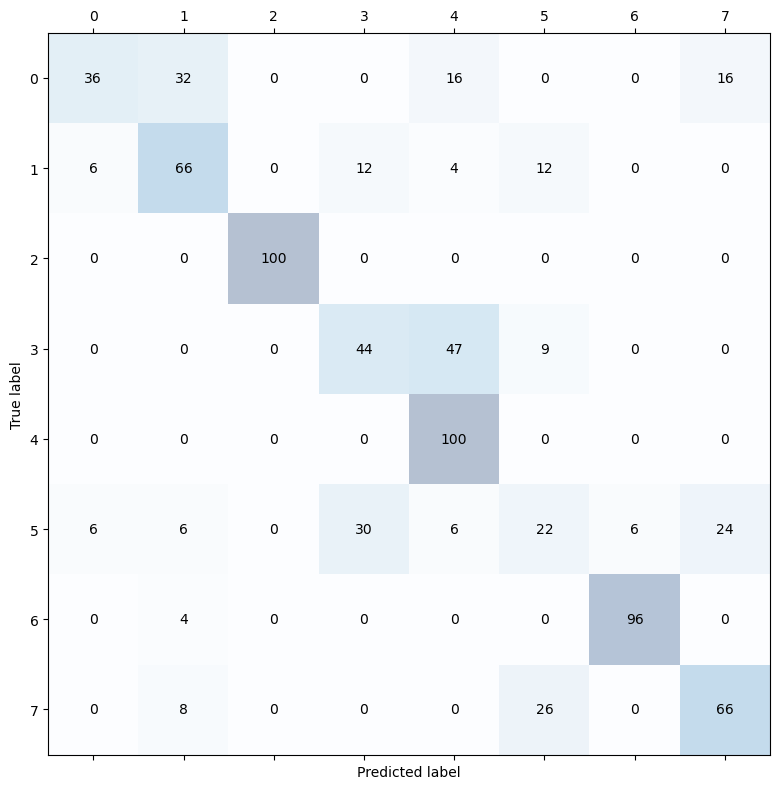

              precision    recall  f1-score   support

           0       0.75      0.36      0.49       100
           1       0.57      0.66      0.61       100
           2       1.00      1.00      1.00       100
           3       0.51      0.44      0.47       100
           4       0.58      1.00      0.73       100
           5       0.32      0.22      0.26       100
           6       0.94      0.96      0.95       100
           7       0.62      0.66      0.64       100

    accuracy                           0.66       800
   macro avg       0.66      0.66      0.64       800
weighted avg       0.66      0.66      0.64       800



Text(0.5, 1.0, 'Confusion Matrix')

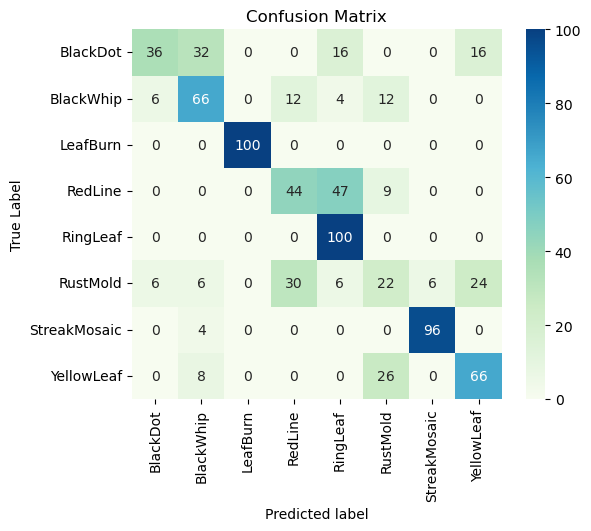

In [7]:
from sklearn.metrics import confusion_matrix , accuracy_score, recall_score , f1_score, classification_report

AlexNet_Model = Sequential()
AlexNet_Model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', padding='valid', input_shape=(128,128,3)))
AlexNet_Model.add(MaxPool2D((3, 3), strides=(2, 2), padding='valid'))
AlexNet_Model.add(Conv2D(256, (5, 5), strides=(1, 1), activation='relu', padding='same'))
AlexNet_Model.add(MaxPool2D((3, 3), strides=(2, 2), padding='valid'))
AlexNet_Model.add(Conv2D(384, (3, 3), strides=(1, 1), activation='relu', padding='same'))
AlexNet_Model.add(Conv2D(384, (3, 3), strides=(1, 1), activation='relu', padding='same'))
AlexNet_Model.add(Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding='same'))
AlexNet_Model.add(MaxPool2D((3, 3), strides=(2, 2), padding='valid'))
AlexNet_Model.add(Flatten())
AlexNet_Model.add(Dense(4096, activation='relu'))
AlexNet_Model.add(Dense(4096, activation='relu'))
AlexNet_Model.add(Dense(8, activation='softmax'))

AlexNet_Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
AlexNet_Model.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_data=(x_test, y_test))

# ทดสอบ model โดยการให้ทายผลจากข้อมูลอย่างละ 100 รูป
AlexNet_ModelPred = AlexNet_Model.predict(x_test)
AlexNet_ModelPred = np.argmax(AlexNet_ModelPred ,axis=1)
# print(len(AlexNet_ModelPred))
# print(AlexNet_ModelPred)

# แปลงค่า label ให้เป็นตัวเลข 0-7 และเก็บไว้ในตัวแปร resaultPredictLabels
AlexNet_ModelPredLabel = convert_to_1d_array(AlexNet_ModelPred)
# print(LeNet_5_ModelPredLabel)

# นำค่าที่ได้มาใช้ในการวัดประสิทธิภาพของ model โดยใช้ confusion matrix, accuracy, recall, f1 score, classification report และ plot confusion matrix
# Create a confusion matrix
AlexNetconfusion_matrix = confusion_matrix(true_labels, AlexNet_ModelPredLabel)
# Accuracy_score
AlexNetaccuracy_score = accuracy_score(true_labels, AlexNet_ModelPredLabel)
# Recall_score
AlexNetrecall_score = recall_score(true_labels, AlexNet_ModelPredLabel, average='macro')
# resaultPredict
AlexNetf1_score = f1_score(true_labels, AlexNet_ModelPredLabel, average='macro' )
# Classification_report
AlexNetlassification_report = classification_report(true_labels, AlexNet_ModelPredLabel, zero_division=1)

# Print resault
# print(confusion_matrix)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(AlexNetconfusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(AlexNetconfusion_matrix.shape[0]):
    for j in range(AlexNetconfusion_matrix.shape[1]):
        ax.text(x=j, y=i, s=AlexNetconfusion_matrix[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()
# print(LeNet_accuracy_score)
# print(LeNet_recall_score)
# print(LeNet_f1_score)
print(AlexNetlassification_report)

# confusionmatrix
axes = sns.heatmap(AlexNetconfusion_matrix ,square=True, annot=True, fmt='d', cbar=True, cmap=plt.cm.GnBu)

classlabels = ['BlackDot', 'BlackWhip', 'LeafBurn', 'RedLine', 'RingLeaf', 'RustMold', 'StreakMosaic', 'YellowLeaf']

axes.set_xlabel('Predicted label')
axes.set_ylabel('True Label')

tick_marks = np.arange(len(classlabels)) + 0.5

axes.set_xticks(tick_marks)
axes.set_xticklabels(classlabels, rotation=90)

axes.set_yticks(tick_marks)
axes.set_yticklabels(classlabels, rotation=0)

axes.set_title('Confusion Matrix')


Inception

Epoch 1/10
100/100 [==============================] - 77s 757ms/step - loss: 1.9037 - accuracy: 0.2491 - val_loss: 1.7170 - val_accuracy: 0.3212
Epoch 2/10
100/100 [==============================] - 75s 754ms/step - loss: 1.3972 - accuracy: 0.4428 - val_loss: 1.2640 - val_accuracy: 0.4963
Epoch 3/10
100/100 [==============================] - 76s 764ms/step - loss: 1.1015 - accuracy: 0.5659 - val_loss: 1.1340 - val_accuracy: 0.4675
Epoch 4/10
100/100 [==============================] - 77s 766ms/step - loss: 0.9282 - accuracy: 0.6756 - val_loss: 1.1938 - val_accuracy: 0.5238
Epoch 5/10
100/100 [==============================] - 76s 759ms/step - loss: 0.8095 - accuracy: 0.7109 - val_loss: 1.0347 - val_accuracy: 0.6212
Epoch 6/10
100/100 [==============================] - 76s 761ms/step - loss: 0.6435 - accuracy: 0.7734 - val_loss: 1.0529 - val_accuracy: 0.6463
Epoch 7/10
100/100 [==============================] - 76s 762ms/step - loss: 0.6152 - accuracy: 0.7887 - val_loss: 0.9117 - val_ac

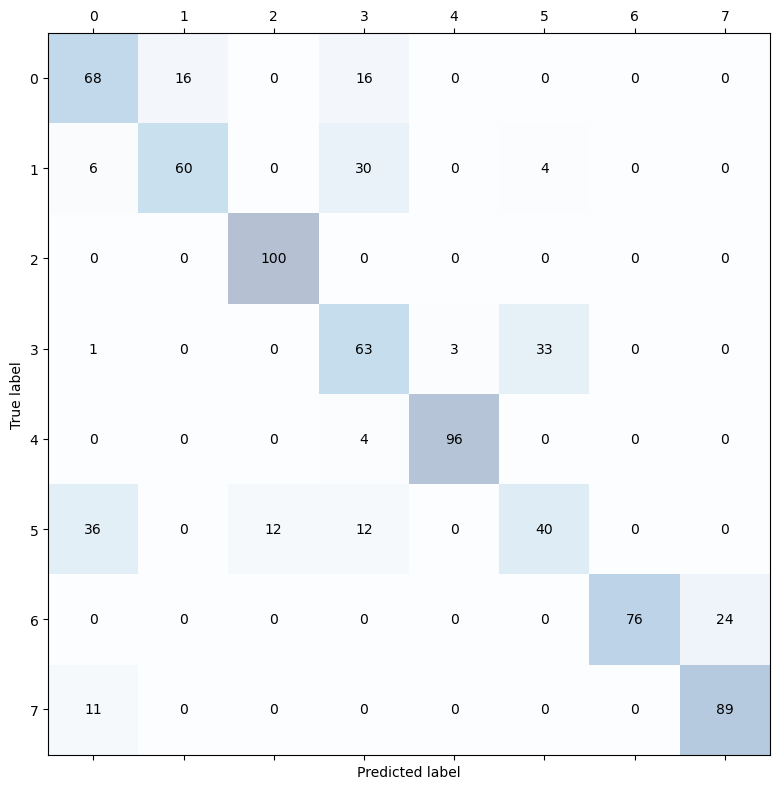

              precision    recall  f1-score   support

           0       0.56      0.68      0.61       100
           1       0.79      0.60      0.68       100
           2       0.89      1.00      0.94       100
           3       0.50      0.63      0.56       100
           4       0.97      0.96      0.96       100
           5       0.52      0.40      0.45       100
           6       1.00      0.76      0.86       100
           7       0.79      0.89      0.84       100

    accuracy                           0.74       800
   macro avg       0.75      0.74      0.74       800
weighted avg       0.75      0.74      0.74       800



Text(0.5, 1.0, 'Confusion Matrix')

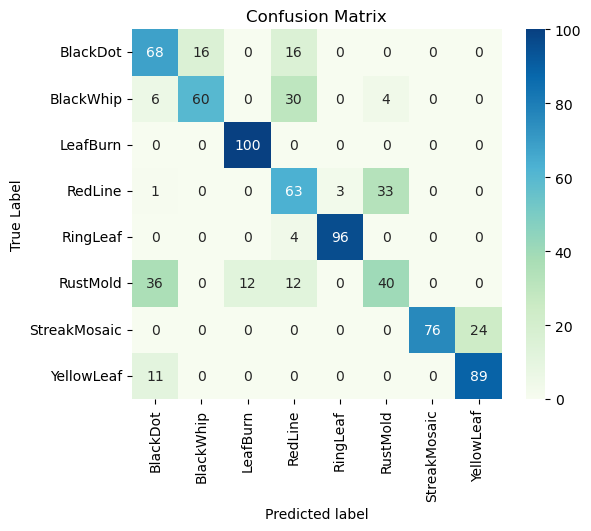

In [8]:
from sklearn.metrics import confusion_matrix , accuracy_score, recall_score , f1_score, classification_report
def InceptionV3(input_shape=(128, 128, 3)):
    model = tf.keras.Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D((3, 3)))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(8, activation='sigmoid'))

    return model

inceptionModel = InceptionV3()
# inceptionModel.summary()

inceptionModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
inceptionModel.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_data=(x_test, y_test))

# ทดสอบ model โดยการให้ทายผลจากข้อมูลอย่างละ 100 รูป
inception_ModelPred = inceptionModel.predict(x_test)
inception_ModelPred = np.argmax(inception_ModelPred ,axis=1)
# print(len(inception_ModelPred))
# print(inception_ModelPred)

# แปลงค่า label ให้เป็นตัวเลข 0-7 และเก็บไว้ในตัวแปร resaultPredictLabels
inception_ModelPredLabel = convert_to_1d_array(inception_ModelPred)
# print(inception_ModelPredLabel)

# นำค่าที่ได้มาใช้ในการวัดประสิทธิภาพของ model โดยใช้ confusion matrix, accuracy, recall, f1 score, classification report และ plot confusion matrix
# Create a confusion matrix
inceptionconfusion_matrix = confusion_matrix(true_labels, inception_ModelPredLabel)
# Accuracy_score
inceptionaccuracy_score = accuracy_score(true_labels, inception_ModelPredLabel)
# Recall_score
inceptionrecall_score = recall_score(true_labels, inception_ModelPredLabel, average='macro')
# resaultPredict
inceptionf1_score = f1_score(true_labels, inception_ModelPredLabel, average='macro' )
# Classification_report
inceptionclassification_report = classification_report(true_labels, inception_ModelPredLabel, zero_division=1)

# Print resault
# print(confusion_matrix)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(inceptionconfusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(inceptionconfusion_matrix.shape[0]):
    for j in range(inceptionconfusion_matrix.shape[1]):
        ax.text(x=j, y=i, s=inceptionconfusion_matrix[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()
# print(LeNet_accuracy_score)
# print(LeNet_recall_score)
# print(LeNet_f1_score)
print(inceptionclassification_report)

# confusionmatrix
axes = sns.heatmap(inceptionconfusion_matrix ,square=True, annot=True, fmt='d', cbar=True, cmap=plt.cm.GnBu)

classlabels = ['BlackDot', 'BlackWhip', 'LeafBurn', 'RedLine', 'RingLeaf', 'RustMold', 'StreakMosaic', 'YellowLeaf']

axes.set_xlabel('Predicted label')
axes.set_ylabel('True Label')

tick_marks = np.arange(len(classlabels)) + 0.5

axes.set_xticks(tick_marks)
axes.set_xticklabels(classlabels, rotation=90)

axes.set_yticks(tick_marks)
axes.set_yticklabels(classlabels, rotation=0)

axes.set_title('Confusion Matrix')

ResNet

Epoch 1/10
100/100 [==============================] - 66s 618ms/step - loss: 0.2870 - accuracy: 0.9200 - val_loss: 9.8742 - val_accuracy: 0.1287
Epoch 2/10
100/100 [==============================] - 61s 611ms/step - loss: 0.0648 - accuracy: 0.9809 - val_loss: 7.9182 - val_accuracy: 0.2425
Epoch 3/10
100/100 [==============================] - 61s 613ms/step - loss: 0.0287 - accuracy: 0.9903 - val_loss: 10.6563 - val_accuracy: 0.1250
Epoch 4/10
100/100 [==============================] - 61s 612ms/step - loss: 0.0576 - accuracy: 0.9828 - val_loss: 3.7628 - val_accuracy: 0.4350
Epoch 5/10
100/100 [==============================] - 61s 614ms/step - loss: 0.0166 - accuracy: 0.9947 - val_loss: 1.7432 - val_accuracy: 0.6450
Epoch 6/10
100/100 [==============================] - 61s 613ms/step - loss: 0.0125 - accuracy: 0.9956 - val_loss: 6.0958 - val_accuracy: 0.2537
Epoch 7/10
100/100 [==============================] - 61s 612ms/step - loss: 0.0361 - accuracy: 0.9881 - val_loss: 1.9048 - val_a

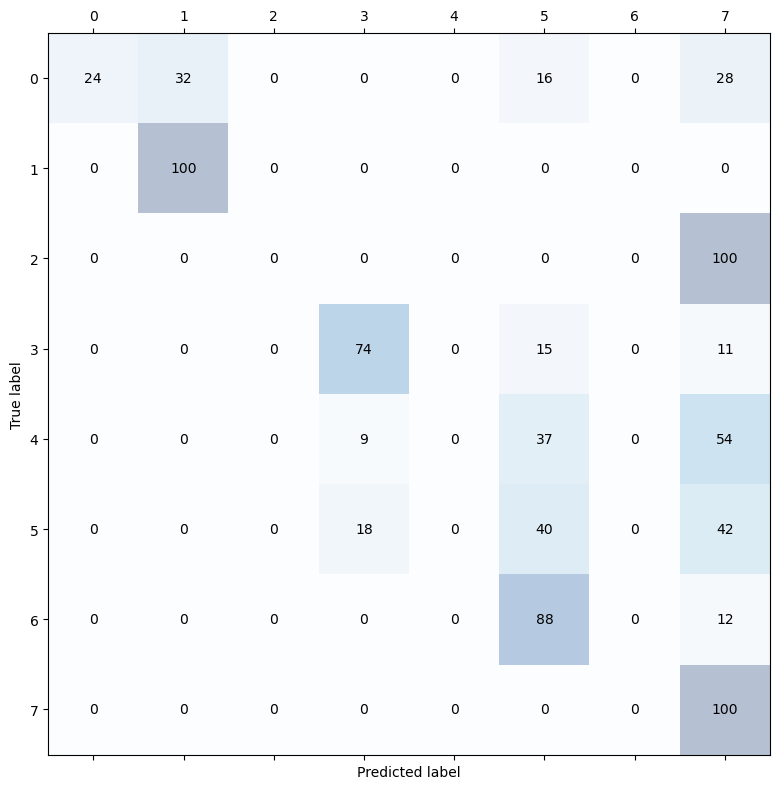

              precision    recall  f1-score   support

           0       1.00      0.24      0.39       100
           1       0.76      1.00      0.86       100
           2       1.00      0.00      0.00       100
           3       0.73      0.74      0.74       100
           4       1.00      0.00      0.00       100
           5       0.20      0.40      0.27       100
           6       1.00      0.00      0.00       100
           7       0.29      1.00      0.45       100

    accuracy                           0.42       800
   macro avg       0.75      0.42      0.34       800
weighted avg       0.75      0.42      0.34       800



Text(0.5, 1.0, 'Confusion Matrix')

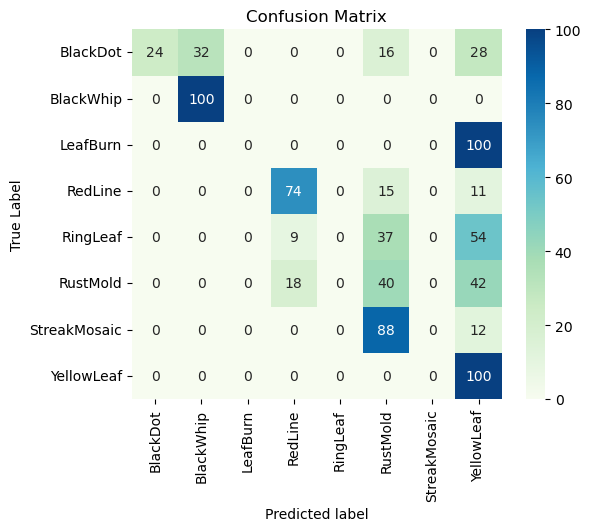

In [9]:
def residual_block(inputs, filters, strides, name):
    """A building block for a ResNet"""
    x = tf.keras.layers.Conv2D(filters, 3, strides=strides, padding='same', name=name+'_conv1')(inputs)
    x = tf.keras.layers.BatchNormalization(name=name+'_bn1')(x)
    x = tf.keras.layers.ReLU(name=name+'_relu1')(x)

    x = tf.keras.layers.Conv2D(filters, 3, strides=1, padding='same', name=name+'_conv2')(x)
    x = tf.keras.layers.BatchNormalization(name=name+'_bn2')(x)

    shortcut = tf.keras.layers.Conv2D(filters, 1, strides=strides, padding='same', name=name+'_shortcut')(inputs)
    shortcut = tf.keras.layers.BatchNormalization(name=name+'_shortcut_bn')(shortcut)

    x = tf.keras.layers.add([x, shortcut], name=name+'_add')
    x = tf.keras.layers.ReLU(name=name+'_relu2')(x)
    return x

def ResNet(input_shape, num_classes):
    """A simple ResNet architecture"""
    inputs = tf.keras.layers.Input(shape=input_shape)

    x = tf.keras.layers.Conv2D(64, 7, strides=2, padding='same', name='conv1')(inputs)
    x = tf.keras.layers.BatchNormalization(name='bn1')(x)
    x = tf.keras.layers.ReLU(name='relu1')(x)
    x = tf.keras.layers.MaxPool2D(3, strides=2, padding='same', name='maxpool')(x)

    x = residual_block(x, 64, 1, name='block1')
    x = residual_block(x, 128, 2, name='block2')
    x = residual_block(x, 256, 2, name='block3')
    x = residual_block(x, 512, 2, name='block4')

    x = tf.keras.layers.GlobalAveragePooling2D(name='avg_pool')(x)
    x = tf.keras.layers.Dense(num_classes, activation='softmax', name='fc')(x)

    model = tf.keras.models.Model(inputs, x, name='ResNet')
    return model

ResNetModel = ResNet((128, 128, 3), 8)
# ResNetModel.summary()

ResNetModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ResNetModel.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_data=(x_test, y_test))

# ทดสอบ model โดยการให้ทายผลจากข้อมูลอย่างละ 100 รูป
ResNet_ModelPred = ResNetModel.predict(x_test)
ResNet_ModelPred = np.argmax(ResNet_ModelPred ,axis=1)
# print(len(ResNet_ModelPred))
# print(ResNet_ModelPred)

# แปลงค่า label ให้เป็นตัวเลข 0-7 และเก็บไว้ในตัวแปร resaultPredictLabels
ResNet_ModelPredLabel = convert_to_1d_array(ResNet_ModelPred)
# print(ResNet_ModelPredLabel)

# นำค่าที่ได้มาใช้ในการวัดประสิทธิภาพของ model โดยใช้ confusion matrix, accuracy, recall, f1 score, classification report และ plot confusion matrix
# Create a confusion matrix
ResNetconfusion_matrix = confusion_matrix(true_labels, ResNet_ModelPredLabel)
# Accuracy_score
ResNetaccuracy_score = accuracy_score(true_labels, ResNet_ModelPredLabel)
# Recall_score
ResNetrecall_score = recall_score(true_labels, ResNet_ModelPredLabel, average='macro')
# resaultPredict
ResNetf1_score = f1_score(true_labels, ResNet_ModelPredLabel, average='macro' )
# Classification_report
ResNetclassification_report = classification_report(true_labels, ResNet_ModelPredLabel, zero_division=1)

# Print resault
# print(confusion_matrix)
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(ResNetconfusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(ResNetconfusion_matrix.shape[0]):
    for j in range(ResNetconfusion_matrix.shape[1]):
        ax.text(x=j, y=i, s=ResNetconfusion_matrix[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()
# print(ResNetaccuracy_score)
# print(ResNetrecall_score)
# print(ResNetf1_score)
print(ResNetclassification_report)

axes = sns.heatmap(ResNetconfusion_matrix ,square=True, annot=True, fmt='d', cbar=True, cmap=plt.cm.GnBu)

classlabels = ['BlackDot', 'BlackWhip', 'LeafBurn', 'RedLine', 'RingLeaf', 'RustMold', 'StreakMosaic', 'YellowLeaf']

axes.set_xlabel('Predicted label')
axes.set_ylabel('True Label')

tick_marks = np.arange(len(classlabels)) + 0.5

axes.set_xticks(tick_marks)
axes.set_xticklabels(classlabels, rotation=90)

axes.set_yticks(tick_marks)
axes.set_yticklabels(classlabels, rotation=0)

axes.set_title('Confusion Matrix')

In [21]:
mobilenetModelModify.save('./model/')

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


In [41]:
from PIL import Image

testImgPath = './ImagesDataset/Test/StreakMosaic/StreakMosaicTest (10).jpg'
img = cv2.imread(testImgPath , cv2.COLOR_BGR2RGB)
#im_bgr = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
im_bgr = cv2.resize(img, (128, 128))
im_bgr = im_bgr.astype('float32')
im_bgr /= 255.00
im_bgr = np.reshape(im_bgr ,(1,128,128,3))
im_bgr

predict = mobilenetModelModify.predict(im_bgr)
label = ['BlackDot','BlackWhip', 'LeafBurn', 'RedLine','RingLeaf' ,'RustMold','StreakMosaic', 'YellowLeaf']
result = label[np.argmax(predict)]
print('Predicted : ',np.max(predict))
print(predict)
print(result)
# img = img.resize((128,128))
# im_bgr = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# rimg = cv2.resize(im_bgr, (128, 128))
# oimg = np.array(rimg)
# oimg = oimg.astype('float32')
# oimg /= 255.00
# oimg = np.reshape(oimg ,(1,128,128,3))

# imgori = Image.open(testImgPath)
# imgori = imgori.resize((128,128))
# imgori = cv2.cvtColor(np.array(imgori) , cv2.COLOR_BGR2RGB)
# rimg = np.array(imgori)
# rimg = rimg.astype('float32')
# rimg /= 255.00
# rimg = np.reshape(rimg ,(1,128,128,3))
# predict = mobilenetModelModify.predict(oimg)
# label = ['BlackDot','BlackWhip', 'LeafBurn', 'RedLine','RingLeaf' ,'RustMold','StreakMosaic', 'YellowLeaf']
# result = label[np.argmax(predict)]
# print('Predicted : ',np.max(predict))
# print(predict)
# print(result)

1/1 [==============================] - 0s 36ms/step
Predicted :  0.988112
[[1.9517596e-08 1.8561691e-04 4.8552643e-04 9.1726676e-04 1.0262271e-02
  3.7130143e-05 9.8811197e-01 2.6038330e-07]]
StreakMosaic


In [4]:
testImgPath = './ImagesDataset/Test/StreakMosaic/StreakMosaicTest (1).jpg'
imgori = cv2.imread(testImgPath)

# imgori = cv2.cvtColor(imgori , cv2.COLOR_BGR2RGB)
imgori = cv2.resize(imgori ,(128,128))
imgori.shape
# rimg = np.array(img)
# rimg = rimg.astype('float32')
# rimg /= 255.00
# rimg = np.reshape(rimg ,(1,128,128,3))
# predict = mobilenetModelModify.predict(rimg)
# label = ['BlackDot','BlackWhip', 'LeafBurn', 'RedLine','RingLeaf' ,'RustMold','StreakMosaic', 'YellowLeaf']
# result = label[np.argmax(predict)]
# print('Predicted : ',np.max(predict))
# print(predict)
# print(result)


(128, 128, 3)